In [5]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

ModuleNotFoundError: No module named 'piplite'

In [4]:
!pip install numpy pandas seaborn


[notice] A new release of pip available: 22.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import pandas as pd

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

df = pd.read_csv(URL)
df.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


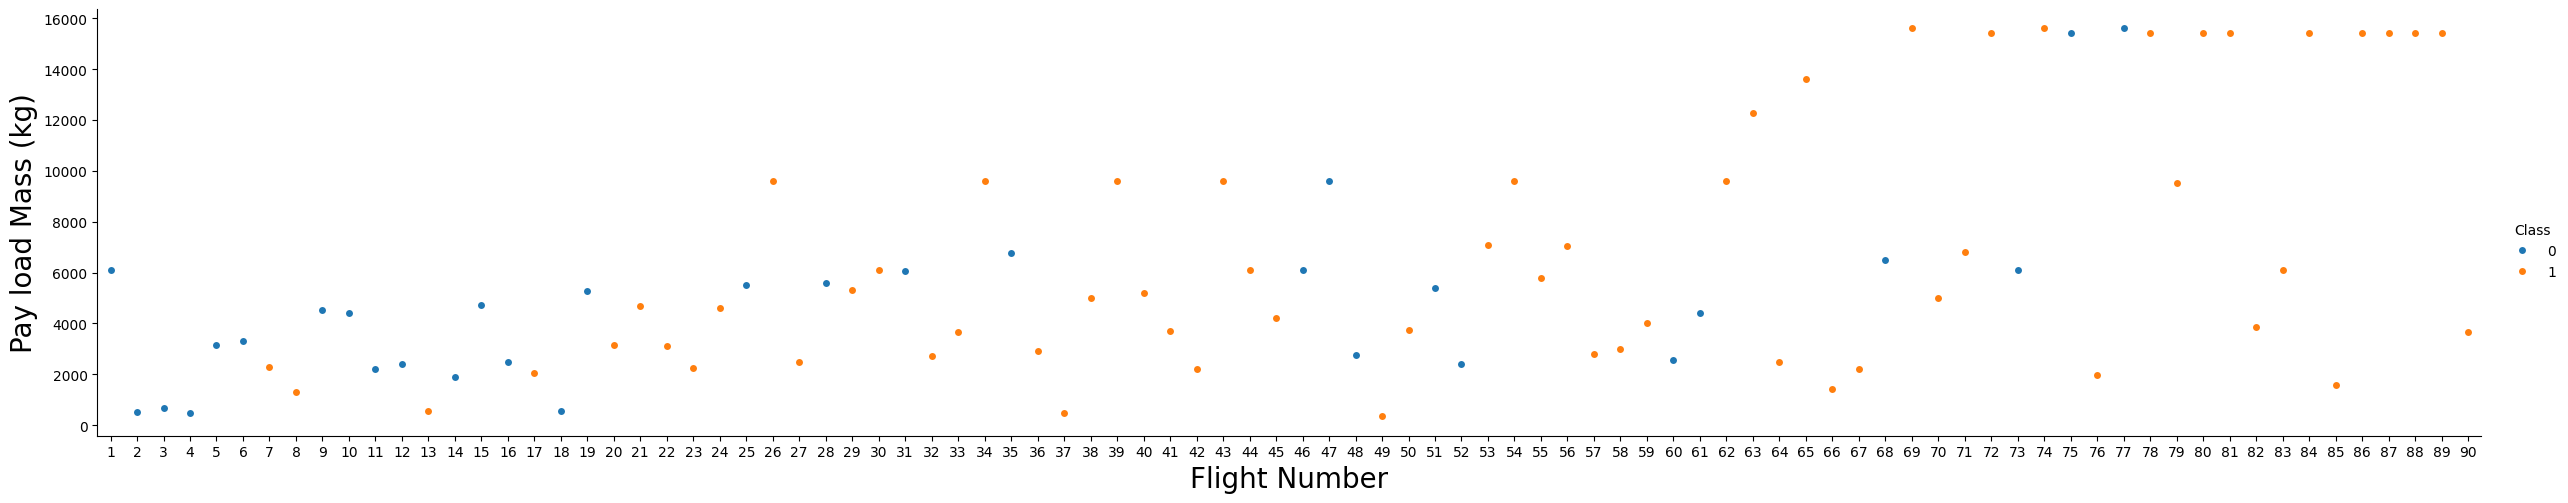

In [10]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

### TASK 1: Visualize the relationship between Flight Number and Launch Site


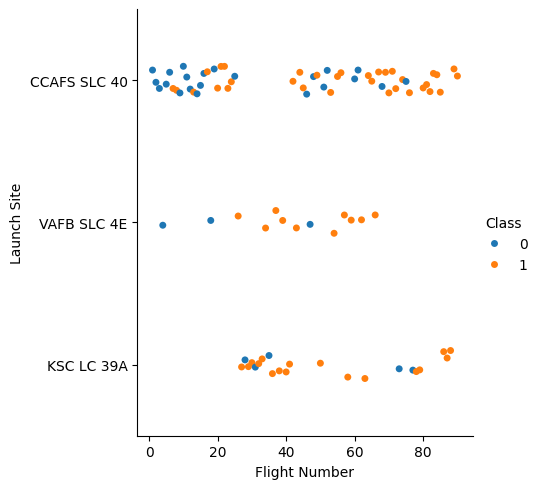

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(
    y="LaunchSite",
    x="FlightNumber",
    hue="Class",
    data=df,
    aspect=1,
    kind="strip"
)

plt.ylabel("Launch Site")
plt.xlabel("Flight Number")
plt.show()


### TASK 2: Visualize the relationship between Payload Mass and Launch Site


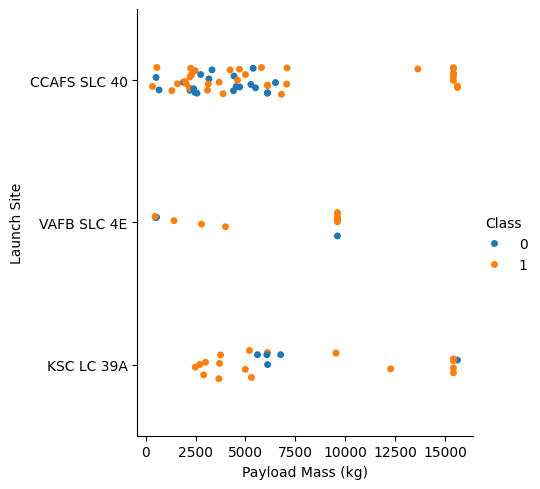

In [12]:
sns.catplot(
    y="LaunchSite",
    x="PayloadMass",
    hue="Class",
    data=df,
    aspect=1,
    kind="strip"
)

plt.ylabel("Launch Site")
plt.xlabel("Payload Mass (kg)")
plt.show()


### TASK  3: Visualize the relationship between success rate of each orbit type


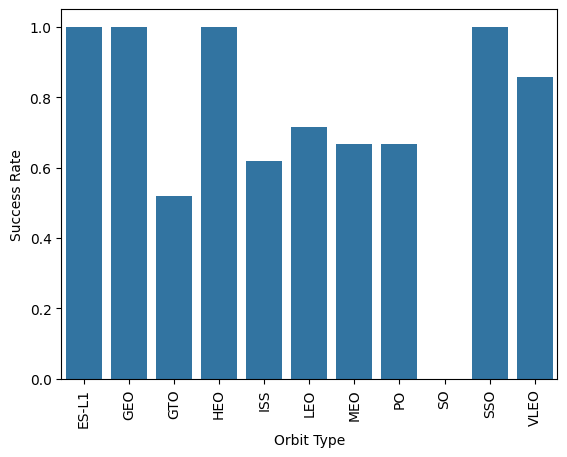

In [14]:
orbit_success = df.groupby("Orbit")["Class"].mean().reset_index()

sns.barplot(
    x="Orbit",
    y="Class",
    data=orbit_success
)

plt.xticks(rotation=90)
plt.ylabel("Success Rate")
plt.xlabel("Orbit Type")
plt.show()


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


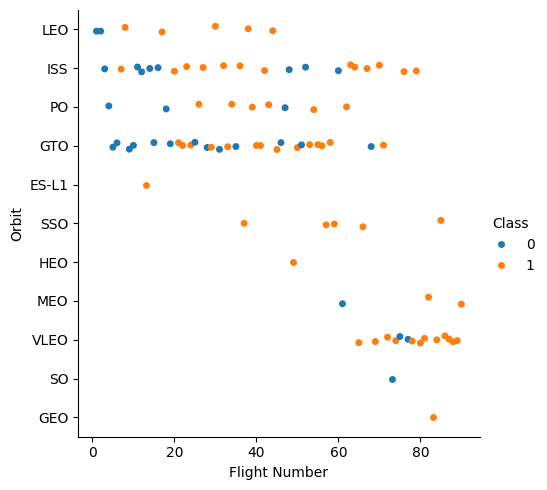

In [17]:
sns.catplot(
    y="Orbit",
    x="FlightNumber",
    hue="Class",
    data=df,
    aspect=1,
    kind="strip"
)

plt.ylabel("Orbit")
plt.xlabel("Flight Number")
plt.show()


### TASK  5: Visualize the relationship between Payload Mass and Orbit type


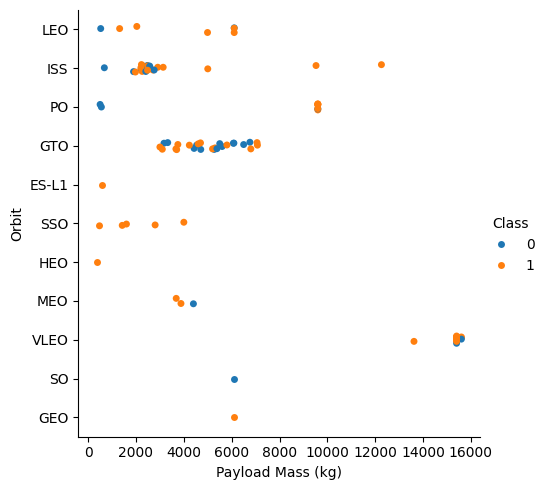

In [18]:
sns.catplot(
    y="Orbit",
    x="PayloadMass",
    hue="Class",
    data=df,
    aspect=1,
    kind="strip"
)

plt.ylabel("Orbit")
plt.xlabel("Payload Mass (kg)")
plt.show()


### TASK  6: Visualize the launch success yearly trend


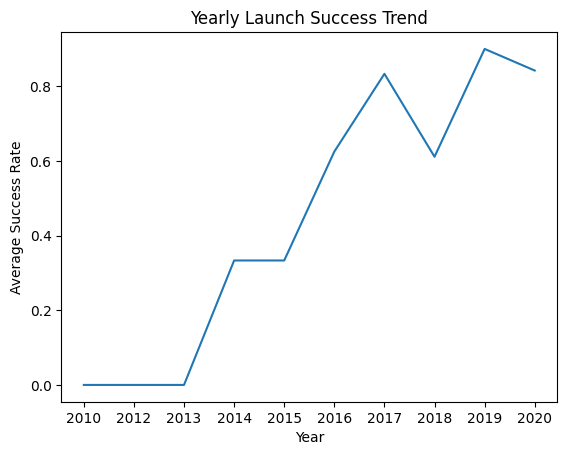

In [19]:
year = []

def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

Extract_year()
df["Year"] = year

yearly_success = df.groupby("Year")["Class"].mean().reset_index()

plt.plot(yearly_success["Year"], yearly_success["Class"])
plt.xlabel("Year")
plt.ylabel("Average Success Rate")
plt.title("Yearly Launch Success Trend")
plt.show()


### TASK  7: Create dummy variables to categorical columns


In [20]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite',
               'Flights', 'GridFins', 'Reused', 'Legs',
               'LandingPad', 'Block', 'ReusedCount', 'Serial']]

features_one_hot = pd.get_dummies(
    features,
    columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial']
)

features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### TASK  8: Cast all numeric columns to `float64`


In [22]:
features_one_hot = features_one_hot.astype('float64')
features_one_hot.to_csv('dataset_part_3.csv', index=False)